<a href="https://colab.research.google.com/github/apfdamascena/deep_learning/blob/main/regression_predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [6]:
# normalization: subtract the mean of the feature and divide by the standard deviation

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [10]:
from keras import models, layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model


In [11]:
# k-fold validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

#prepares the validatio n data: data from partition #k

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
  val_target = train_targets[i*num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]], axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]], axis=0
  )

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs,
            batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
all_scores

[1.9730116128921509, 2.256735324859619, 2.6117801666259766, 2.3154780864715576]

In [13]:
np.mean(all_scores)

2.289251297712326

In [16]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print("processing fold #", i)
  val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
  val_target = train_targets[i*num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
      train_data[(i+1) * num_val_samples:]], axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], 
       train_targets[(i+1)*num_val_samples:]], axis=0
  )

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_target),
                      epochs = num_epochs,
                      batch_size=1,
                      verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
all_mae_histories

[[14.78868579864502,
  5.73430871963501,
  4.113219738006592,
  3.680628776550293,
  3.524855613708496,
  3.204287052154541,
  3.271087646484375,
  3.0239627361297607,
  2.961214303970337,
  2.91154408454895,
  2.8620851039886475,
  2.7630324363708496,
  2.6233417987823486,
  2.5326242446899414,
  2.6545047760009766,
  2.477973461151123,
  2.3286662101745605,
  2.3654110431671143,
  2.259889602661133,
  2.42073130607605,
  2.215080976486206,
  2.3355872631073,
  2.1944069862365723,
  2.225788116455078,
  2.225348949432373,
  2.230330467224121,
  2.232210636138916,
  2.164816379547119,
  2.2764577865600586,
  2.0983312129974365,
  2.3144266605377197,
  2.022489309310913,
  2.3641610145568848,
  2.160614252090454,
  2.0787367820739746,
  2.0519320964813232,
  2.3252923488616943,
  2.001744270324707,
  2.0160903930664062,
  2.172729730606079,
  2.1228115558624268,
  2.123685359954834,
  2.1355254650115967,
  1.9550082683563232,
  1.912637710571289,
  1.9063947200775146,
  1.95610260963439

In [18]:
avarage_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [19]:
avarage_mae_history

[15.305989265441895,
 6.474470257759094,
 4.828410267829895,
 4.1824750900268555,
 3.8723778128623962,
 3.627155065536499,
 3.5406460762023926,
 3.3714346289634705,
 3.25488942861557,
 3.1962069272994995,
 3.1026649475097656,
 3.018464982509613,
 2.9863983392715454,
 2.9180928468704224,
 2.889217793941498,
 2.7940911650657654,
 2.748996078968048,
 2.74025160074234,
 2.6647226214408875,
 2.694149613380432,
 2.607384145259857,
 2.673872649669647,
 2.565109133720398,
 2.6218518018722534,
 2.5673421025276184,
 2.5458977818489075,
 2.544953763484955,
 2.5521010160446167,
 2.5450379848480225,
 2.4728919863700867,
 2.517779290676117,
 2.4681249856948853,
 2.5256584882736206,
 2.4536918997764587,
 2.462570607662201,
 2.4215587973594666,
 2.5069713592529297,
 2.3913421034812927,
 2.3642452359199524,
 2.4467039108276367,
 2.4058956503868103,
 2.382750928401947,
 2.426554322242737,
 2.418131649494171,
 2.3523626923561096,
 2.350664794445038,
 2.331673264503479,
 2.360846161842346,
 2.371810019016

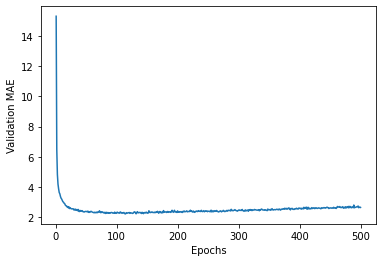

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(avarage_mae_history)+1), avarage_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

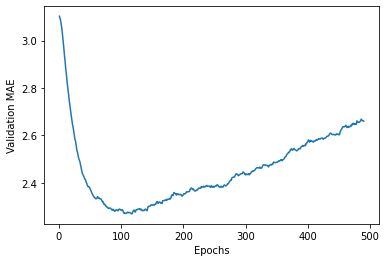

In [23]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(avarage_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [24]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 42.1913 - mae: 4.8985


In [25]:
test_mae_score

4.898516654968262